In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU
from sklearn.metrics import mean_squared_error

2024-06-09 20:10:09.079571: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-09 20:10:09.862961: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-09 20:10:30.855975: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
# Fetch historical data for Russell 2000 index
data = yf.download('^RUT', start='2005-01-01', end='2023-06-01')

# Use only the 'Close' price
data = data[['Close']]
data.info()

[*********************100%%**********************]  1 of 1 completed


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4634 entries, 2005-01-03 to 2023-05-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   4634 non-null   float64
dtypes: float64(1)
memory usage: 72.4 KB


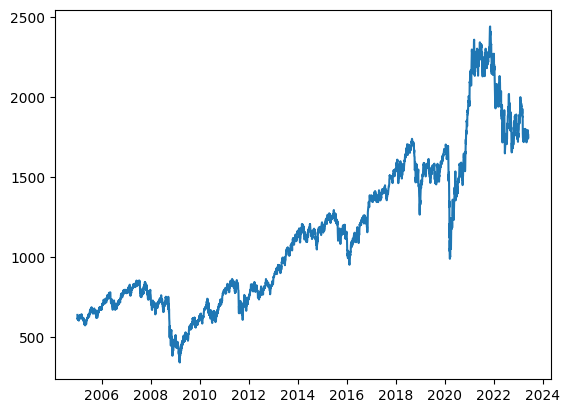

In [9]:
import mplfinance as mpf

plt.plot(data)

In [10]:
# Feature Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [11]:
# Create sequences for training
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

In [12]:
# Define sequence length
seq_length = 60

# Create sequences
X, y = create_sequences(scaled_data, seq_length)

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3659, 60, 1)

(915, 60, 1)

(3659,)

(915,)

In [13]:
# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

2024-06-09 20:16:21.906770: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-09 20:16:21.911311: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-09 20:16:21.914255: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [14]:
# Compile the LSTM model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')


In [15]:
# Train the LSTM model
lstm_history = lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

Epoch 1/20


2024-06-09 20:17:19.901309: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-09 20:17:19.905153: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-09 20:17:19.909092: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

103/103 [==============================] - ETA: 0s - loss: 0.0033

2024-06-09 20:17:34.449219: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-09 20:17:34.452257: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-09 20:17:34.454362: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

103/103 [==============================] - 16s 90ms/step - loss: 0.0033 - val_loss: 3.8146e-04
Epoch 2/20
Epoch 2/20
103/103 [==============================] - 8s 73ms/step - loss: 1.3850e-04 - val_loss: 3.9938e-04
Epoch 3/20
103/103 [==============================] - 8s 83ms/step - loss: 1.2964e-04 - val_loss: 4.1653e-04
Epoch 4/20
103/103 [==============================] - 7s 73ms/step - loss: 1.2831e-04 - val_loss: 3.1013e-04
Epoch 5/20
103/103 [==============================] - 8s 74ms/step - loss: 1.2941e-04 - val_loss: 3.8382e-04
Epoch 6/20
103/103 [==============================] - 8s 74ms/step - loss: 1.2782e-04 - val_loss: 3.3729e-04
Epoch 7/20
103/103 [==============================] - 7s 72ms/step - loss: 1.1036e-04 - val_loss: 2.6595e-04
Epoch 8/20
103/103 [==============================] - 7s 71ms/step - loss: 1.1495e-04 - val_loss: 2.4324e-04
Epoch 9/20
103/103 [==============================] - 7s 71ms/step - loss: 1.0689e-04 - val_loss: 2.2703e-04
Epoch 10/20
103/103 [=

In [17]:
# Make predictions with LSTM
lstm_predicted_prices = lstm_model.predict(X_test)
display(lstm_predicted_prices.T)

29/29 [==============================] - 1s 36ms/step


array([[0.54644555, 0.54923856, 0.5528219 , 0.5576242 , 0.5620886 ,
        0.5668762 , 0.5700083 , 0.57307476, 0.57533854, 0.5767826 ,
        0.5769698 , 0.5775114 , 0.57974607, 0.5831088 , 0.585786  ,
        0.5861121 , 0.5877979 , 0.59108883, 0.5947957 , 0.5966394 ,
        0.59725976, 0.5976585 , 0.5975511 , 0.597271  , 0.59640354,
        0.59538895, 0.5954611 , 0.5958262 , 0.59686106, 0.5973215 ,
        0.59639645, 0.5953979 , 0.598353  , 0.6034532 , 0.60939974,
        0.6131259 , 0.61250323, 0.60885364, 0.6058567 , 0.604552  ,
        0.60679764, 0.6102018 , 0.6133732 , 0.6154511 , 0.61769164,
        0.61884415, 0.62033004, 0.6226399 , 0.6253807 , 0.62825376,
        0.6309948 , 0.63321286, 0.6349968 , 0.6360989 , 0.63561565,
        0.63379604, 0.6322479 , 0.6312736 , 0.6302943 , 0.6297887 ,
        0.6291795 , 0.6291955 , 0.62978035, 0.629722  , 0.6305189 ,
        0.63241017, 0.6351988 , 0.6402704 , 0.6448436 , 0.6461965 ,
        0.6449785 , 0.6427953 , 0.63835233, 0.63

In [20]:
# Inverse transform the LSTM predictions
lstm_predicted_prices = scaler.inverse_transform(lstm_predicted_prices)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))
display(lstm_predicted_prices[-5:].T, actual_prices[-5:].T)


array([[7.8974167e+09, 7.8850033e+09, 7.8395259e+09, 7.8077199e+09,
        7.7913359e+09]], dtype=float32)

array([[1767.        , 1754.59997559, 1773.02001953, 1767.29003906,
        1749.65002441]])

In [21]:
# Evaluate the LSTM model
lstm_mse = mean_squared_error(actual_prices, lstm_predicted_prices)
print(f'LSTM Mean Squared Error: {lstm_mse}')

LSTM Mean Squared Error: 6.900399264508026e+19


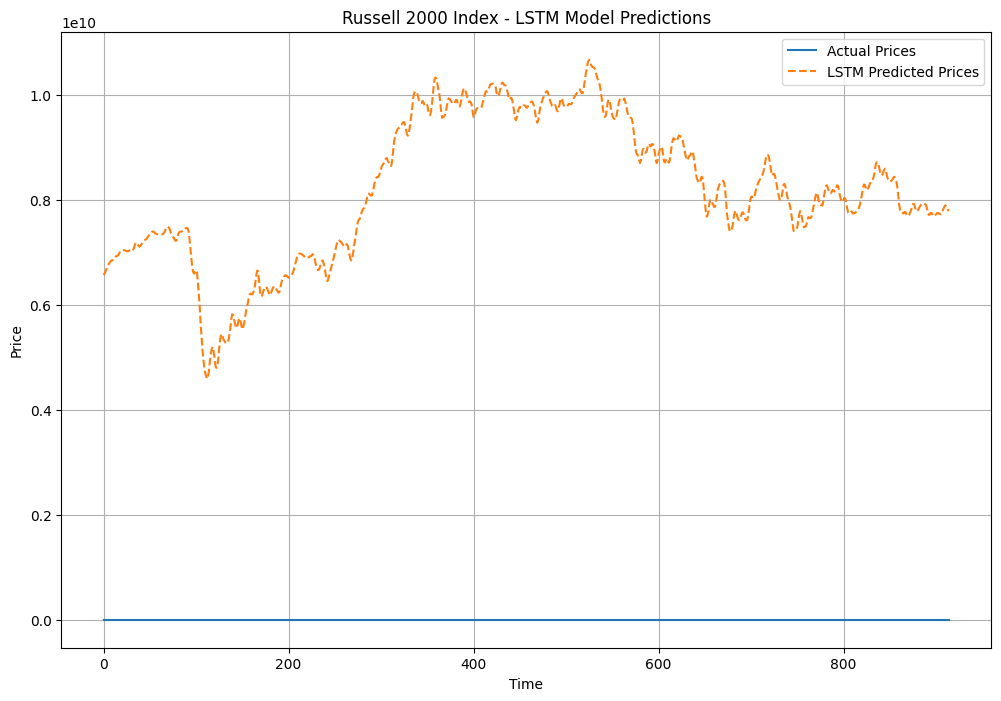

In [22]:
# Plot the results for LSTM
plt.figure(figsize=(12, 8))
plt.plot(actual_prices, label='Actual Prices')
plt.plot(lstm_predicted_prices, label='LSTM Predicted Prices', linestyle='--')
plt.title('Russell 2000 Index - LSTM Model Predictions')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

### # Build the GRU model

In [23]:
# Build the GRU model
gru_model = Sequential()
gru_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
gru_model.add(GRU(units=50))
gru_model.add(Dense(1))

2024-06-09 21:11:51.002645: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-09 21:11:51.004977: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-09 21:11:51.006854: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [31]:
display(X_train.shape[0], X_train.shape[1], X_train.shape[2])

3659

60

1

In [30]:
# Compile the GRU model
gru_model.compile(optimizer='adam', loss='mean_squared_error')


In [32]:
# Train the GRU model
gru_history = gru_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

Epoch 1/20


2024-06-09 21:18:51.252765: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-09 21:18:51.255550: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-09 21:18:51.258610: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

103/103 [==============================] - ETA: 0s - loss: 0.0017

2024-06-09 21:19:07.103652: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-09 21:19:07.107701: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-09 21:19:07.110413: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

103/103 [==============================] - 17s 103ms/step - loss: 0.0017 - val_loss: 1.5363e-04
Epoch 2/20
Epoch 2/20
103/103 [==============================] - 8s 73ms/step - loss: 6.1488e-05 - val_loss: 1.3782e-04
Epoch 3/20
103/103 [==============================] - 8s 73ms/step - loss: 5.7828e-05 - val_loss: 1.2466e-04
Epoch 4/20
103/103 [==============================] - 8s 74ms/step - loss: 5.5634e-05 - val_loss: 1.1480e-04
Epoch 5/20
103/103 [==============================] - 9s 85ms/step - loss: 5.2135e-05 - val_loss: 1.1248e-04
Epoch 6/20
103/103 [==============================] - 11s 108ms/step - loss: 5.0778e-05 - val_loss: 1.0025e-04
Epoch 7/20
103/103 [==============================] - 10s 99ms/step - loss: 4.8907e-05 - val_loss: 9.3098e-05
Epoch 8/20
103/103 [==============================] - 10s 94ms/step - loss: 4.3998e-05 - val_loss: 9.7899e-05
Epoch 9/20
103/103 [==============================] - 7s 72ms/step - loss: 4.6461e-05 - val_loss: 9.8804e-05
Epoch 10/20
103/1

In [33]:
# Make predictions with GRU
gru_predicted_prices = gru_model.predict(X_test)

2024-06-09 21:22:28.818039: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-09 21:22:28.821396: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-09 21:22:28.824786: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

29/29 [==============================] - 2s 21ms/step


In [34]:
# Inverse transform the GRU predictions
gru_predicted_prices = scaler.inverse_transform(gru_predicted_prices)

In [35]:
# Evaluate the GRU model
gru_mse = mean_squared_error(actual_prices, gru_predicted_prices)
print(f'GRU Mean Squared Error: {gru_mse}')


GRU Mean Squared Error: 977.5732317573182


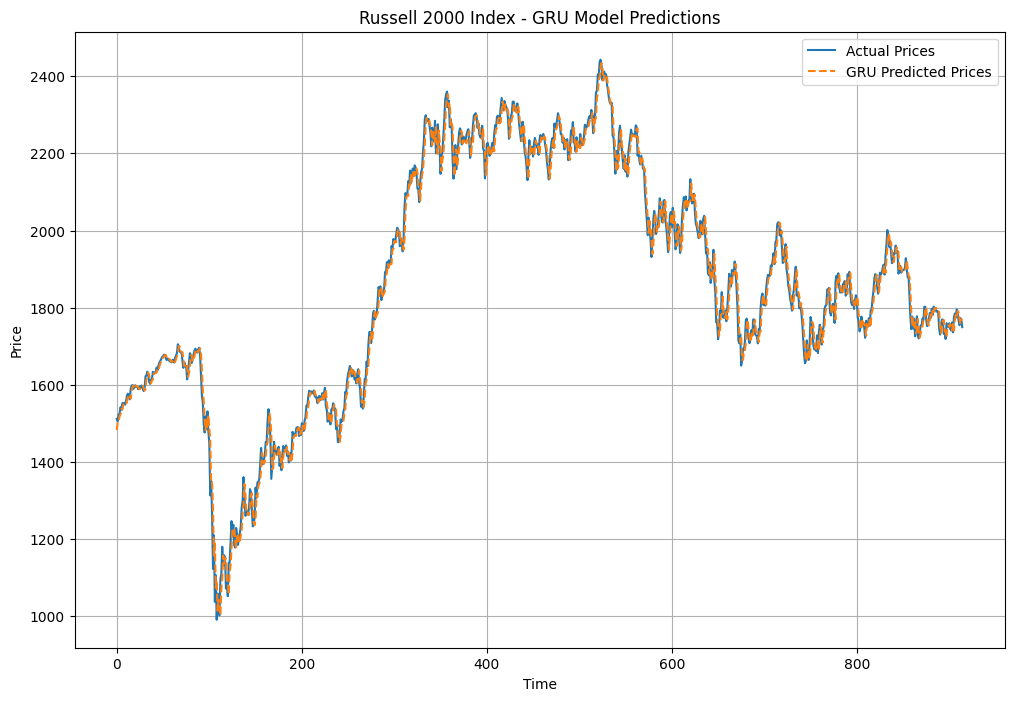

In [36]:
# Plot the results for GRU
plt.figure(figsize=(12, 8))
plt.plot(actual_prices, label='Actual Prices')
plt.plot(gru_predicted_prices, label='GRU Predicted Prices', linestyle='--')
plt.title('Russell 2000 Index - GRU Model Predictions')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

#### # Predict the next 5 days using the LSTM model

In [37]:
# Predict the next 5 days using the LSTM model
lstm_last_sequence = scaled_data[-seq_length:]
lstm_last_sequence = lstm_last_sequence.reshape((1, seq_length, 1))

In [38]:
lstm_next_5_days_predictions = []
for _ in range(5):
    next_day_prediction = lstm_model.predict(lstm_last_sequence)
    lstm_next_5_days_predictions.append(next_day_prediction[0, 0])
    lstm_last_sequence = np.append(lstm_last_sequence[:, 1:, :], next_day_prediction.reshape(1, 1, 1), axis=1)

lstm_next_5_days_predictions = scaler.inverse_transform(np.array(lstm_next_5_days_predictions).reshape(-1, 1))
print(f'LSTM Next 5 days predictions: {lstm_next_5_days_predictions.flatten()}')

1/1 [==============================] - 0s 32ms/step
LSTM Next 5 days predictions: [1762.6643 1761.0881 1761.6757 1763.2732 1765.1989]


### Predict the next 5 days using the GRU model

In [39]:
# Predict the next 5 days using the GRU model
gru_last_sequence = scaled_data[-seq_length:]
gru_last_sequence = gru_last_sequence.reshape((1, seq_length, 1))

In [40]:
gru_next_5_days_predictions = []
for _ in range(5):
    next_day_prediction = gru_model.predict(gru_last_sequence)
    gru_next_5_days_predictions.append(next_day_prediction[0, 0])
    gru_last_sequence = np.append(gru_last_sequence[:, 1:, :], next_day_prediction.reshape(1, 1, 1), axis=1)

gru_next_5_days_predictions = scaler.inverse_transform(np.array(gru_next_5_days_predictions).reshape(-1, 1))
print(f'GRU Next 5 days predictions: {gru_next_5_days_predictions.flatten()}')

1/1 [==============================] - 0s 33ms/step
GRU Next 5 days predictions: [1752.8983 1752.5092 1752.2753 1752.0309 1751.79  ]


LSTM Next 5 days predictions: [1762.6643 1761.0881 1761.6757 1763.2732 1765.1989]  

GRU Next 5 days predictions: [1752.8983 1752.5092 1752.2753 1752.0309 1751.79  ]

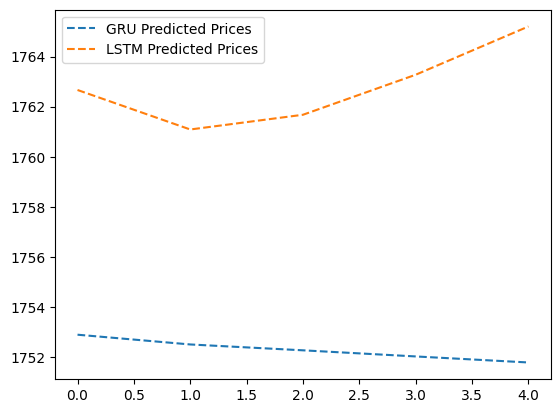

In [41]:
plt.plot(gru_next_5_days_predictions, label='GRU Predicted Prices', linestyle='--')
plt.plot(lstm_next_5_days_predictions, label='LSTM Predicted Prices', linestyle='--')
plt.legend()
plt.show()
